In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import matplotlib

In [135]:
class Perceptron:
    def __init__(self,X_features,y_true, **args):
        if len(args)!=0:
            
            self.Weight=np.random.randn(X_features.shape[1],1)
            self.bias=np.random.randn()            
            self.datasize_nsamples=len(X_features)
            self.datasize_nfeatures=X_features.shape[1]
            self.data_X_train=X_features.copy()
            self.data_y_true=y_true
            
            if args['function_activation'] == "relu":
                self.Activation_Function=np.vectorize(lambda x: x if x>0 else 0,otypes=['float'])
                self.Activation_Function_Derivative=np.vectorize(lambda x: 1 if x>0 else 0,otypes=['float'])
                self.Activation_Function_treshold=0
            elif args['function_activation'] == "sigmoid":
                self.Activation_Function=np.vectorize(lambda x: 1/(1+np.exp(-x)),otypes=['float'])
                self.Activation_Function_Derivative=np.vectorize(lambda x: 1/(1+np.exp(-x)) * (1-1/(1+np.exp(-x))),otypes=['float'])
                self.Activation_Function_treshold=0.5
        else:
            print('Unknown Activation Function')
            return(False)
        
        
    def train(self,**args):
        if len(args)==2:
            l_r=args['learning_rate']
            epochs=args['epochs']
            
            self.Weight_history=[]
            self.bias_history=[]
            self.loss_curve_data = []
            self.accuracy_curve_data = []
            for epoch in range(epochs):
                sigma=self.data_X_train.dot(self.Weight) + self.bias
                f_sigma=self.Activation_Function(sigma).reshape(-1)
                f_sigma_der=self.Activation_Function_Derivative(sigma).reshape(-1)
                delta=(f_sigma-self.data_y_true)*f_sigma_der
                
                dW=(1/self.datasize_nsamples)*np.dot((self.data_X_train).T, delta)
                db=delta.sum()/self.datasize_nsamples

                self.Weight-=l_r*(dW.reshape(self.datasize_nfeatures,1))
                self.Weight_history.append(self.Weight.copy())
                self.bias-=l_r*db
                self.bias_history.append(self.bias.copy())
                
                yfound=1*(self.Activation_Function(self.data_X_train.dot(self.Weight) + self.bias)>self.Activation_Function_treshold)
                yfound=yfound.reshape(self.datasize_nsamples)
                                           
                self.accuracy_curve_data.append(100*np.count_nonzero((yfound==self.data_y_true))/len(self.data_y_true))
                self.loss_curve_data.append(((f_sigma-self.data_y_true)**2).mean())
                
                if epoch%int(epochs/10)==0 or epoch==epochs-1:
                    print("Avancement ",epoch+1,'/',epochs,' : ', np.round(100*(epoch+1)/epochs,1),'%{:>5} - loss : '.format(''),self.loss_curve_data[epoch], '{:>5} - acc : '.format(''),self.accuracy_curve_data[epoch])
        
        else:
            print('Unknown learning_rate or epochs')
            return(False)
        
    def predict(self, X_test):
        self.predict_result=1*(self.Activation_Function(self.data_X_train.dot(self.Weight) + self.bias)>self.Activation_Function_treshold).reshape(self.datasize_nsamples)
        return(self.predict_result)
    
    def accuracy_curve(self):
        pd.DataFrame(self.accuracy_curve_data, columns=['accuracy']).plot()
    def loss_curve(self):
        pd.DataFrame(self.loss_curve_data, columns=['loss']).plot()
        
    def decision_boundary(self):
        for i in range(self.datasize_nfeatures-1):
            plt.figure(121 + i)
            sns.scatterplot(x=self.data_X_train[:,i],y=self.data_X_train[:,i+1], hue=self.data_y_true)
            a0_1=-self.Weight[i:i+2][0]/self.Weight[i:i+2][1]
            b0_1=-self.bias/self.Weight[i:i+2][1]
            f=lambda x:a0_1*x+b0_1
            x_db=[self.data_X_train[:,i].min(),self.data_X_train[:,i].max()]
            plt.plot(x_db,f(x_db))
            plt.xlim(1.20*self.data_X_train[:,i].min(),1.20*self.data_X_train[:,i].max())
            plt.ylim(1.20*self.data_X_train[:,i+1].min(),1.20*self.data_X_train[:,i+1].max())
    
        
        
        

In [147]:
n_features=2
n_clusters=2

X, y = make_classification(n_features=n_features, n_redundant=0, n_informative=2)
m1=Perceptron(X,y,function_activation="sigmoid")

# Dataset généré et target associée

In [148]:
data=pd.DataFrame(X)
data['target']=y
data

,0,1,target
0,1.279513,1.329260,1
1,0.557910,-0.714258,1
2,-1.631537,1.895483,0
3,1.889016,-1.248183,1
4,0.948877,-1.034327,1
...,...,...,...
95,-2.171104,-1.418170,0
96,0.722574,-0.402654,0
97,2.609504,2.441945,1
98,-1.116730,1.307940,0


# Distribution des points et de leur target

<AxesSubplot:>

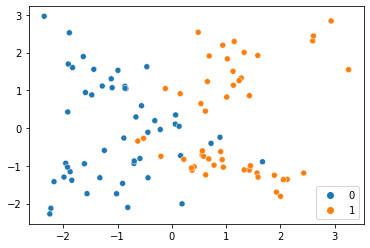

In [149]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

# Entraînement

In [150]:
m1.train(learning_rate=0.15, epochs=300)

Avancement  1 / 300  :  0.3 %      - loss :  0.4617121278180599       - acc :  34.0
Avancement  31 / 300  :  10.3 %      - loss :  0.36118600408769774       - acc :  44.0
Avancement  61 / 300  :  20.3 %      - loss :  0.2492535924956032       - acc :  55.0
Avancement  91 / 300  :  30.3 %      - loss :  0.16960968850964464       - acc :  77.0
Avancement  121 / 300  :  40.3 %      - loss :  0.13250645906887848       - acc :  87.0
Avancement  151 / 300  :  50.3 %      - loss :  0.1150085839407066       - acc :  87.0
Avancement  181 / 300  :  60.3 %      - loss :  0.10539221066562306       - acc :  89.0
Avancement  211 / 300  :  70.3 %      - loss :  0.09943915611123443       - acc :  89.0
Avancement  241 / 300  :  80.3 %      - loss :  0.09543421474688643       - acc :  89.0
Avancement  271 / 300  :  90.3 %      - loss :  0.09257284287729024       - acc :  89.0
Avancement  300 / 300  :  100.0 %      - loss :  0.09049612742354213       - acc :  89.0


# Courbes d'apprentissage : accuracy curve et loss curve

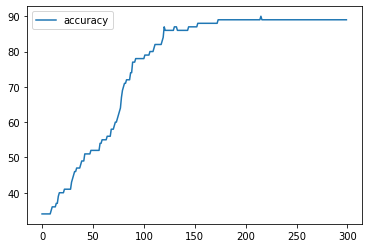

In [151]:
m1.accuracy_curve()

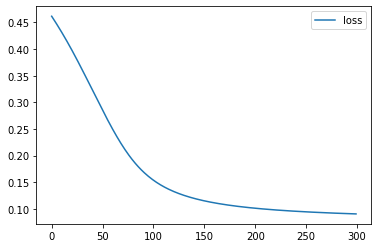

In [152]:
m1.loss_curve()

# Decision boundary

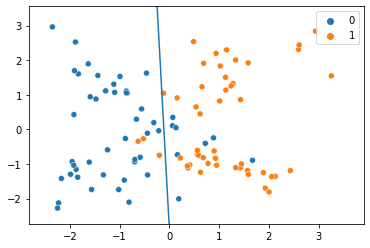

In [153]:
m1.decision_boundary()

# Prédiction

<AxesSubplot:>

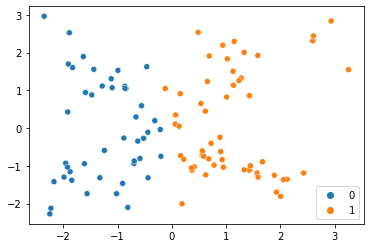

In [154]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=m1.predict(X))

# Evolution du biais

<AxesSubplot:>

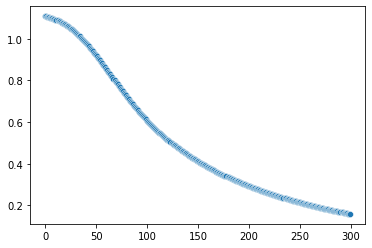

In [155]:
sns.scatterplot(y=m1.bias_history, x=range(len(m1.bias_history)))